In [1]:
import pandas as pd
import seaborn as sns

/Users/adamcatto/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


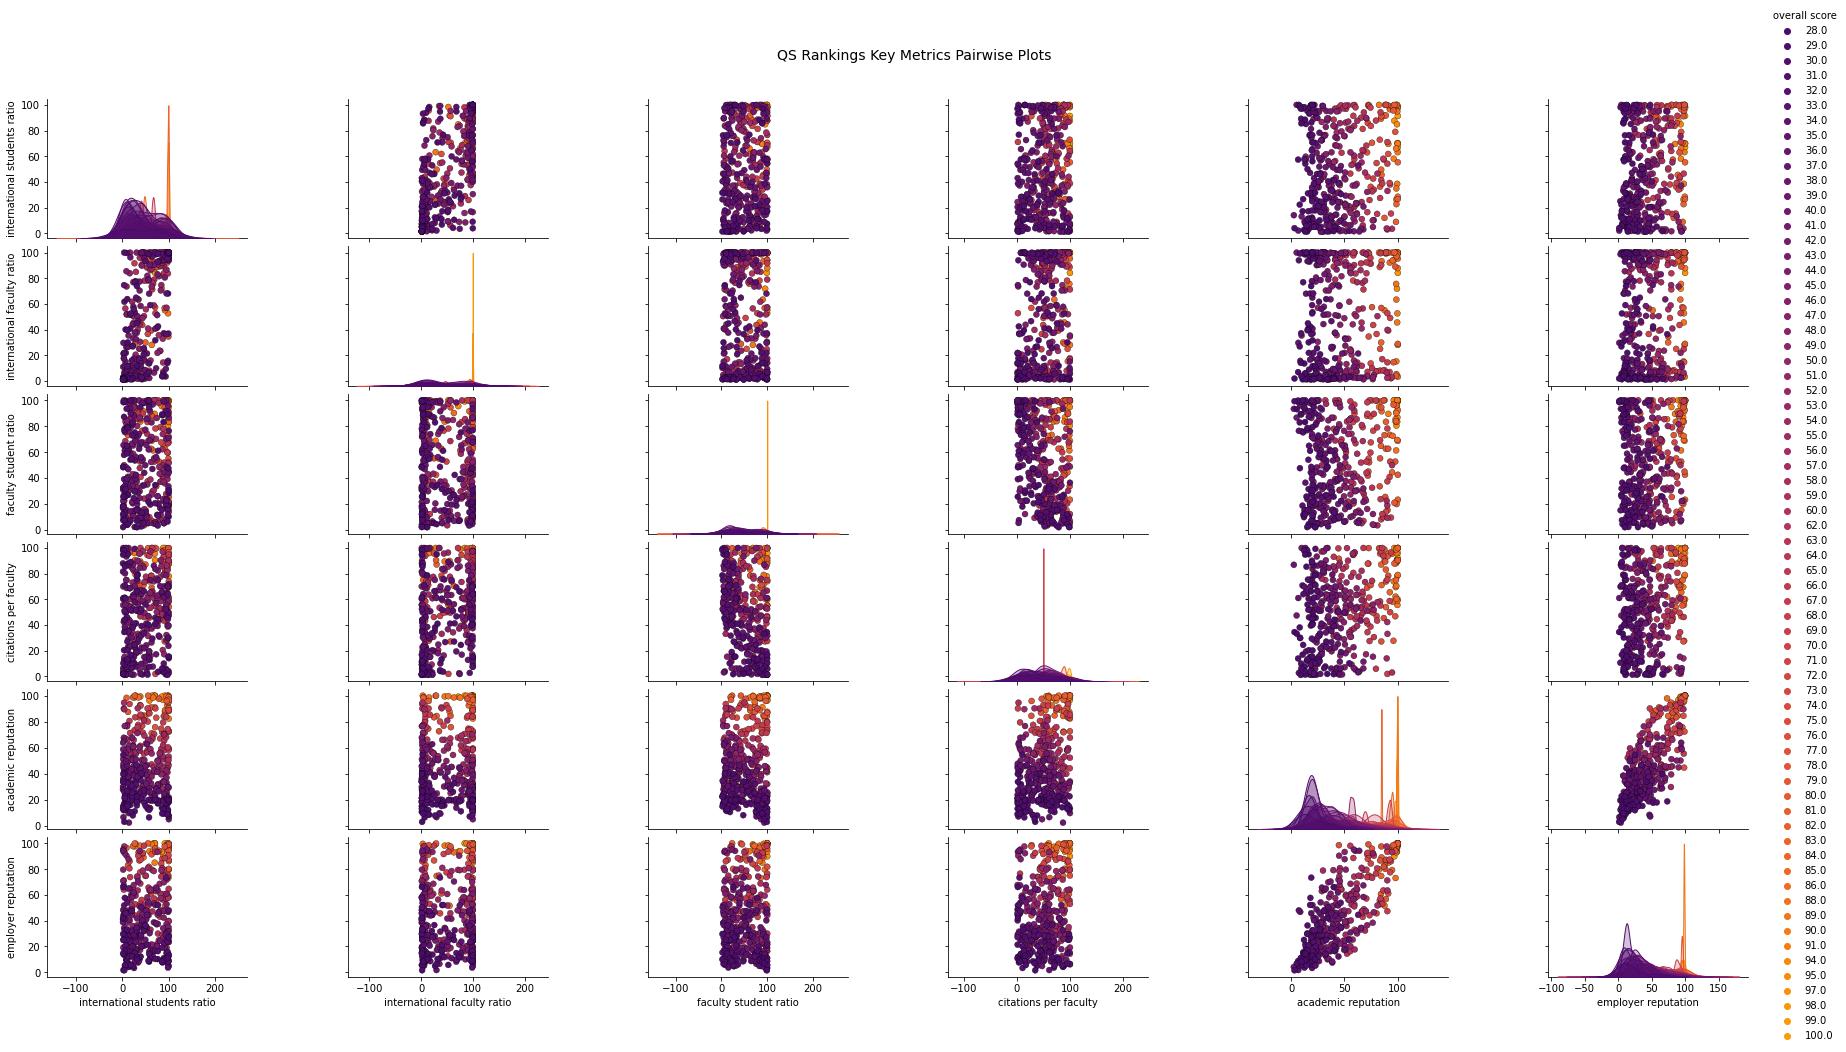

In [29]:
df = pd.read_csv('qs_rankings_2022.csv')
df = df.iloc[0:400, :]
palette=sns.color_palette("inferno", as_cmap=True).colors
palette = {i: palette[2*i] for i in range(101)}

cols = [
    'international students ratio', 'international faculty ratio', 'faculty student ratio',
    'citations per faculty', 'academic reputation', 'employer reputation', 'overall score'
]
df['overall score'] = df['overall score'].round()
pp = sns.pairplot(df[cols], hue='overall score', size=2.3, aspect=1.8,
                  palette=palette,
                  plot_kws=dict(edgecolor="black", linewidth=0.3))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.5)
t = fig.suptitle('QS Rankings Key Metrics Pairwise Plots', fontsize=14)

In [35]:
high_cite_low_score = df[(df['citations per faculty'] > 95) & (df['overall score'] < 70)]
high_cite_low_score

,Unnamed: 0,overall score,international students ratio,international faculty ratio,faculty student ratio,citations per faculty,academic reputation,employer reputation
66,University of Texas at Austin,68.0,15.4,2.1,9.5,96.6,93.6,86.1
69,KU Leuven,67.0,41.4,90.3,8.1,96.9,84.4,56.1
80,Pohang University of Science And Technology (P...,65.0,3.0,17.6,100.0,99.7,44.3,64.1
85,University of Washington,65.0,38.8,17.0,12.2,100.0,85.4,53.0
88,Georgia Institute of Technology,64.0,64.1,71.3,6.9,100.0,67.8,79.4
98,University of Science and Technology of China,60.0,6.4,8.4,83.6,99.9,52.4,14.4
120,University of Bern,56.0,44.0,100.0,67.5,97.6,30.4,35.0
132,Nanjing University,54.0,9.2,52.0,30.1,96.4,59.6,17.7
139,University of Basel,53.0,86.7,100.0,49.7,97.2,28.7,25.9
146,"University of California, Santa Barbara (UCSB)",51.0,37.2,44.1,10.7,95.6,57.8,25.3


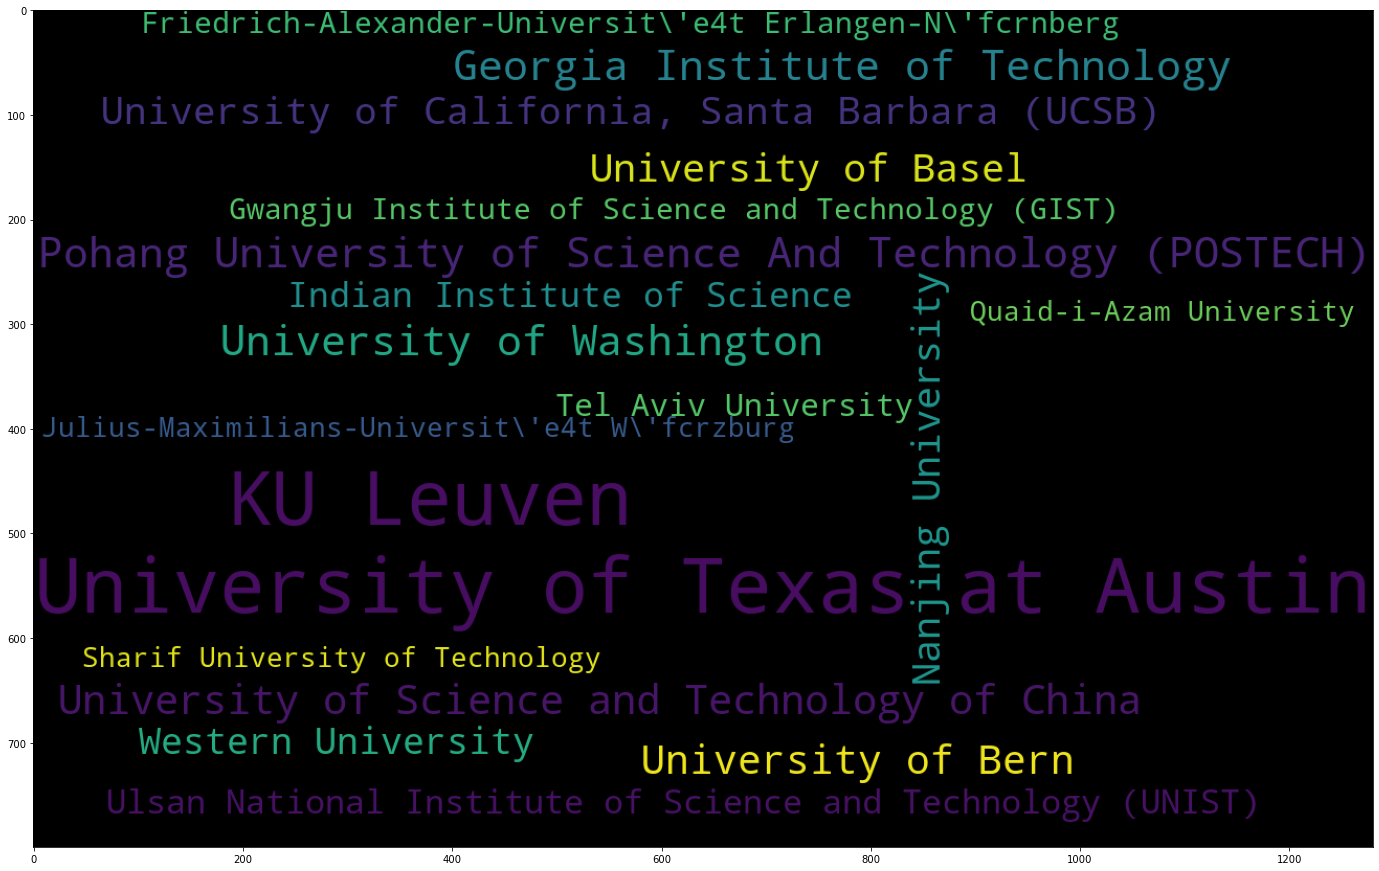

In [59]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

d = {
    u : -c
    for u, c in zip(
        high_cite_low_score['Unnamed: 0'],
        1 - np.array(high_cite_low_score['overall score'])
    )
}

wc = WordCloud(width = 1280, height = 800).generate_from_frequencies(d)
plt.figure(figsize=(24,16))
plt.imshow(wc)
wc.to_file('high_cite_low_score_wordcloud.png')

/Users/adamcatto/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


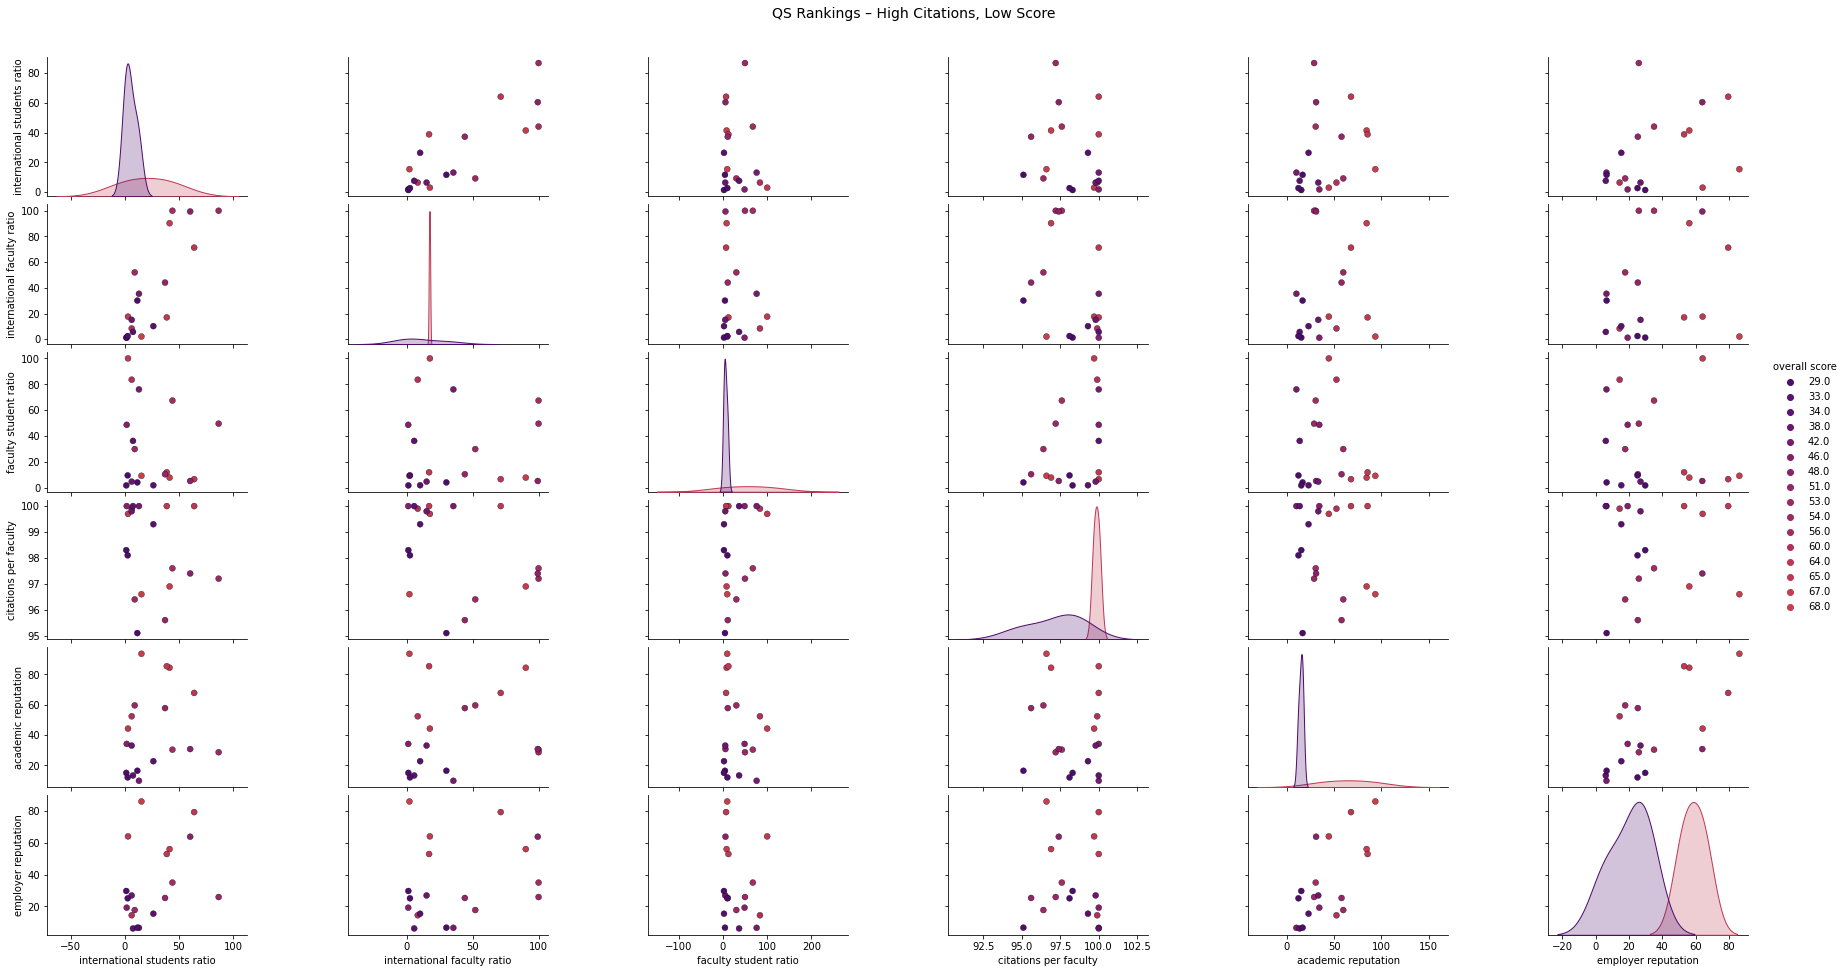

In [57]:
cols = [
    'international students ratio', 'international faculty ratio', 'faculty student ratio',
    'citations per faculty', 'academic reputation', 'employer reputation', 'overall score'
]
pp = sns.pairplot(high_cite_low_score[cols], hue='overall score', size=2.3, aspect=1.8,
                  palette=palette,
                  plot_kws=dict(edgecolor="black", linewidth=0.3))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.5)
t = fig.suptitle('QS Rankings – High Citations, Low Score', fontsize=14)

In [36]:
low_cite_high_rep = df[(df['citations per faculty'] < 60) & (df['academic reputation'] > 85)]
low_cite_high_rep

,Unnamed: 0,overall score,international students ratio,international faculty ratio,faculty student ratio,citations per faculty,academic reputation,employer reputation
14,Yale University,90.0,69.8,87.9,100.0,59.9,99.9,100.0
18,Columbia University,89.0,98.4,52.7,100.0,55.6,99.6,98.4
25,University of Toronto,85.0,94.9,98.6,69.4,58.8,99.5,98.2
28,The University of Manchester,84.0,99.3,94.0,72.5,58.1,95.2,98.0
34,King's College London,82.0,100.0,99.2,83.4,53.9,88.9,86.2
41,New York University (NYU),79.0,95.6,14.6,96.6,27.7,95.9,98.6
45,University of British Columbia,77.0,79.0,89.1,52.7,46.8,97.6,94.2
52,Duke University,75.0,57.4,NaN,100.0,45.4,86.9,81.8
63,Ludwig-Maximilians-Universit\'e4t M\'fcnchen,70.0,38.0,49.1,52.7,50.0,92.8,77.5
67,National Taiwan University (NTU),68.0,39.2,7.0,40.8,58.7,92.3,87.4


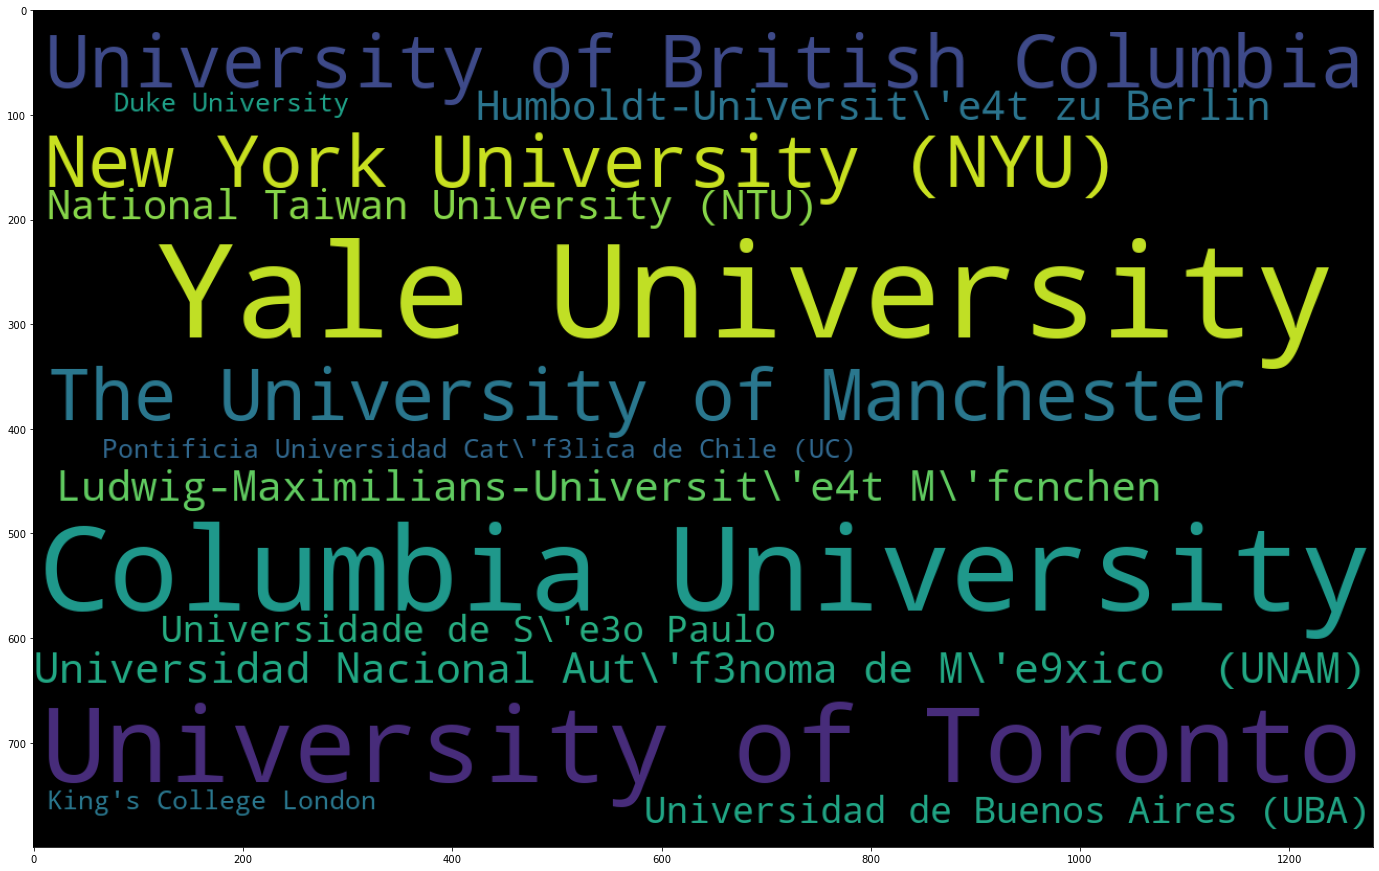

In [62]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

d = {
    u : -c
    for u, c in zip(
        low_cite_high_rep['Unnamed: 0'],
        1 - np.array(low_cite_high_rep['academic reputation'])
    )
}

wc = WordCloud(width = 1280, height = 800).generate_from_frequencies(d)
plt.figure(figsize=(24,16))
plt.imshow(wc)
wc.to_file('low_cite_high_rep_wordcloud.png')

In [37]:
high_cite_low_rep = df[(df['citations per faculty'] > 95) & (df['academic reputation'] < 60)]
high_cite_low_rep

,Unnamed: 0,overall score,international students ratio,international faculty ratio,faculty student ratio,citations per faculty,academic reputation,employer reputation
54,City University of Hong Kong,75.0,99.9,100.0,89.7,96.5,59.4,33.0
80,Pohang University of Science And Technology (P...,65.0,3.0,17.6,100.0,99.7,44.3,64.1
98,University of Science and Technology of China,60.0,6.4,8.4,83.6,99.9,52.4,14.4
120,University of Bern,56.0,44.0,100.0,67.5,97.6,30.4,35.0
132,Nanjing University,54.0,9.2,52.0,30.1,96.4,59.6,17.7
139,University of Basel,53.0,86.7,100.0,49.7,97.2,28.7,25.9
146,"University of California, Santa Barbara (UCSB)",51.0,37.2,44.1,10.7,95.6,57.8,25.3
170,Western University,48.0,60.4,99.4,5.5,97.4,30.8,63.9
186,Indian Institute of Science,46.0,1.8,1.2,48.8,100.0,34.2,19.2
212,Ulsan National Institute of Science and Techno...,42.0,13.1,35.4,76.1,100.0,9.9,6.5


In [46]:
import numpy as np

df['avg'] = df[['international faculty ratio', 'international students ratio', 'faculty student ratio', 'citations per faculty']].mean(axis=1)
df.head()

,Unnamed: 0,overall score,international students ratio,international faculty ratio,faculty student ratio,citations per faculty,academic reputation,employer reputation,gmean,gmean academic reputation ratio,gmean employer reputation ratio,avg
0,Massachusetts Institute of Technology (MIT),100.0,91.4,100.0,100.0,100.0,100.0,100.0,97.776964,0.977770,0.977770,97.850
1,University of Oxford,100.0,98.5,99.5,100.0,96.0,100.0,100.0,98.487845,0.984878,0.984878,98.500
2,Stanford University,99.0,67.0,99.8,100.0,99.9,100.0,100.0,90.405054,0.904051,0.904051,91.675
3,University of Cambridge,99.0,97.7,100.0,100.0,92.1,100.0,100.0,97.395423,0.973954,0.973954,97.450
4,Harvard University,98.0,70.1,84.2,99.1,100.0,100.0,100.0,87.453247,0.874532,0.874532,88.350


In [47]:
df['avg academic reputation ratio'] = df['avg'] / df['academic reputation']
df['avg employer reputation ratio'] = df['avg'] / df['employer reputation']

In [48]:
df

,Unnamed: 0,overall score,international students ratio,international faculty ratio,faculty student ratio,citations per faculty,academic reputation,employer reputation,gmean,gmean academic reputation ratio,gmean employer reputation ratio,avg,avg academic reputation ratio,avg employer reputation ratio
0,Massachusetts Institute of Technology (MIT),100.0,91.4,100.0,100.0,100.0,100.0,100.0,97.776964,0.977770,0.977770,97.850,0.978500,0.978500
1,University of Oxford,100.0,98.5,99.5,100.0,96.0,100.0,100.0,98.487845,0.984878,0.984878,98.500,0.985000,0.985000
2,Stanford University,99.0,67.0,99.8,100.0,99.9,100.0,100.0,90.405054,0.904051,0.904051,91.675,0.916750,0.916750
3,University of Cambridge,99.0,97.7,100.0,100.0,92.1,100.0,100.0,97.395423,0.973954,0.973954,97.450,0.974500,0.974500
4,Harvard University,98.0,70.1,84.2,99.1,100.0,100.0,100.0,87.453247,0.874532,0.874532,88.350,0.883500,0.883500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Indian Institute of Technology Guwahati (IITG),28.0,1.3,1.4,12.0,94.8,13.2,14.5,6.745517,0.511024,0.465208,27.375,2.073864,1.887931
396,National Research Tomsk Polytechnic University,28.0,85.6,3.8,89.1,6.2,9.6,8.1,20.588831,2.144670,2.541831,46.175,4.809896,5.700617
397,Pontificia Universidad Catolica del Peru,28.0,1.7,1.6,25.6,1.7,39.9,66.1,3.298485,0.082669,0.049901,7.650,0.191729,0.115734
398,Pakistan Institute of Engineering and Applied ...,28.0,NaN,NaN,93.1,33.2,5.4,6.9,NaN,NaN,NaN,63.150,11.694444,9.152174


In [51]:
df_sorted_avg_academic_rep = df.sort_values('avg academic reputation ratio', ascending=False)
df_sorted_avg_academic_rep

,Unnamed: 0,overall score,international students ratio,international faculty ratio,faculty student ratio,citations per faculty,academic reputation,employer reputation,gmean,gmean academic reputation ratio,gmean employer reputation ratio,avg,avg academic reputation ratio,avg employer reputation ratio
253,Yeshiva University,38.0,14.1,NaN,93.4,86.9,2.6,4.1,NaN,NaN,NaN,64.800,24.923077,15.804878
241,USI - Universit\'e0 della Svizzera italiana,40.0,100.0,100.0,86.6,47.4,5.2,4.8,80.043129,15.392909,16.675652,83.500,16.057692,17.395833
398,Pakistan Institute of Engineering and Applied ...,28.0,NaN,NaN,93.1,33.2,5.4,6.9,NaN,NaN,NaN,63.150,11.694444,9.152174
390,Universit\'e0 Vita-Salute San Raffaele,29.0,4.0,1.9,99.3,34.5,3.2,1.5,12.702684,3.969589,8.468456,34.925,10.914062,23.283333
317,IE University,33.0,100.0,94.0,76.4,2.7,7.3,48.0,37.316100,5.111794,0.777419,68.275,9.352740,1.422396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Universidad Nacional Aut\'f3noma de M\'e9xico ...,58.0,3.5,2.9,49.9,3.0,94.6,93.2,6.243412,0.065998,0.066989,14.825,0.156712,0.159067
370,Universidade Federal do Rio de Janeiro,30.0,1.8,3.1,17.9,10.2,54.5,25.1,5.649654,0.103663,0.225086,8.250,0.151376,0.328685
136,Pontificia Universidad Cat\'f3lica de Chile (UC),54.0,3.8,6.5,22.4,14.0,89.6,97.6,9.381413,0.104703,0.096121,11.675,0.130301,0.119621
184,Universidad de Chile,46.0,4.9,2.8,12.2,15.3,76.7,92.3,7.113795,0.092748,0.077073,8.800,0.114733,0.095341


In [56]:
df_sorted_avg_employer_rep = df.sort_values('avg employer reputation ratio', ascending=False)
df_sorted_avg_employer_rep[-20:]

,Unnamed: 0,overall score,international students ratio,international faculty ratio,faculty student ratio,citations per faculty,academic reputation,employer reputation,gmean,gmean academic reputation ratio,gmean employer reputation ratio,avg,avg academic reputation ratio,avg employer reputation ratio
268,National Yang Ming Chiao Tung University,37.0,12.6,7.1,46.8,34.1,32.6,64.9,19.438255,0.596265,0.299511,25.150,0.771472,0.387519
166,Alma Mater Studiorum - University of Bologna,48.0,10.3,4.7,3.8,51.8,77.5,46.6,9.880118,0.127485,0.212020,17.650,0.227742,0.378755
185,Indian Institute of Technology Delhi (IITD),46.0,1.7,1.2,30.9,70.0,45.8,70.8,8.150264,0.177953,0.115117,25.950,0.566594,0.366525
66,University of Texas at Austin,68.0,15.4,2.1,9.5,96.6,93.6,86.1,13.125329,0.140228,0.152443,30.900,0.330128,0.358885
207,Universidad Aut\'f3noma de Madrid,43.0,11.7,2.6,40.9,22.7,58.5,56.7,12.963644,0.221601,0.228636,19.475,0.332906,0.343474
370,Universidade Federal do Rio de Janeiro,30.0,1.8,3.1,17.9,10.2,54.5,25.1,5.649654,0.103663,0.225086,8.250,0.151376,0.328685
399,University of the Philippines,28.0,1.4,1.1,48.3,1.9,33.9,42.1,3.447906,0.101708,0.081898,13.175,0.388643,0.312945
178,Indian Institute of Technology Bombay (IITB),46.0,1.6,1.5,32.5,55.5,51.3,79.6,8.111420,0.158117,0.101902,22.775,0.443957,0.286118
308,University of Warsaw,34.0,10.0,2.7,39.6,6.2,46.5,53.9,9.023243,0.194048,0.167407,14.625,0.314516,0.271336
201,Keio University,44.0,13.2,3.6,62.8,7.1,50.2,87.7,12.064897,0.240337,0.137570,21.675,0.431773,0.247149


In [68]:
rank_df = pd.read_csv('qs-world-university-rankings-2017-to-2022-V2.csv')
rank_df_groupyear = rank_df.groupby('year')
rank_df_2022 = list(rank_df_groupyear)[-1][1]
countries = rank_df_2022[['university', 'country']]
df_with_countries = pd.merge(left=df, right=countries, left_on='Unnamed: 0', right_on='university', how='left')
df_with_countries

,Unnamed: 0,overall score,international students ratio,international faculty ratio,faculty student ratio,citations per faculty,academic reputation,employer reputation,gmean,gmean academic reputation ratio,gmean employer reputation ratio,avg,avg academic reputation ratio,avg employer reputation ratio,university,country
0,Massachusetts Institute of Technology (MIT),100.0,91.4,100.0,100.0,100.0,100.0,100.0,97.776964,0.977770,0.977770,97.850,0.978500,0.978500,Massachusetts Institute of Technology (MIT),United States
1,University of Oxford,100.0,98.5,99.5,100.0,96.0,100.0,100.0,98.487845,0.984878,0.984878,98.500,0.985000,0.985000,University of Oxford,United Kingdom
2,Stanford University,99.0,67.0,99.8,100.0,99.9,100.0,100.0,90.405054,0.904051,0.904051,91.675,0.916750,0.916750,Stanford University,United States
3,University of Cambridge,99.0,97.7,100.0,100.0,92.1,100.0,100.0,97.395423,0.973954,0.973954,97.450,0.974500,0.974500,University of Cambridge,United Kingdom
4,Harvard University,98.0,70.1,84.2,99.1,100.0,100.0,100.0,87.453247,0.874532,0.874532,88.350,0.883500,0.883500,Harvard University,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Indian Institute of Technology Guwahati (IITG),28.0,1.3,1.4,12.0,94.8,13.2,14.5,6.745517,0.511024,0.465208,27.375,2.073864,1.887931,Indian Institute of Technology Guwahati (IITG),India
396,National Research Tomsk Polytechnic University,28.0,85.6,3.8,89.1,6.2,9.6,8.1,20.588831,2.144670,2.541831,46.175,4.809896,5.700617,National Research Tomsk Polytechnic University,Russia
397,Pontificia Universidad Catolica del Peru,28.0,1.7,1.6,25.6,1.7,39.9,66.1,3.298485,0.082669,0.049901,7.650,0.191729,0.115734,Pontificia Universidad Catolica del Peru,Peru
398,Pakistan Institute of Engineering and Applied ...,28.0,NaN,NaN,93.1,33.2,5.4,6.9,NaN,NaN,NaN,63.150,11.694444,9.152174,Pakistan Institute of Engineering and Applied ...,Pakistan


In [82]:
import math

def swap_country_name(country: str):
    if isinstance(country, float):
        return 'nan'
    # if math.isnan(float(country)):
    #     return 'nan'
    if country == 'United States':
        return 'United States of America'
    elif country == 'China (Mainland)':
        return 'China'
    elif country == 'Hong Kong SAR':
        return 'Hong Kong'
    elif country == 'Czech Republic':
        return 'Czechia'
    elif country[0:4] == 'Iran':
        return 'Iran'
    elif country[0:5] == 'Macau':
        return 'Macau'
    
    else:
        return country
    
# df_with_countries['country'].unique()

df_with_countries['country'] = df_with_countries['country'].apply(lambda x: swap_country_name(x))
df_with_countries.to_csv('qs_rankings_raw_with_countries.csv')

In [100]:
df_with_countries['citations vs academic reputation ratio'] = df_with_countries['citations per faculty'] / df_with_countries['academic reputation']
df_with_countries = df_with_countries.dropna(axis=0)

In [101]:
df_with_countries.to_csv('qs_rankings_raw_with_countries.csv')

In [102]:
df_with_countries.sort_values('citations vs academic reputation ratio')

,Unnamed: 0,overall score,international students ratio,international faculty ratio,faculty student ratio,citations per faculty,academic reputation,employer reputation,gmean,gmean academic reputation ratio,gmean employer reputation ratio,avg,avg academic reputation ratio,avg employer reputation ratio,university,country,citations vs academic reputation ratio
68,Universidad de Buenos Aires (UBA),68.0,71.1,52.8,78.2,1.9,90.2,93.4,27.328511,0.302977,0.292596,51.000,0.565410,0.546039,Universidad de Buenos Aires (UBA),Argentina,0.021064
175,Al-Farabi Kazakh National University,47.0,24.4,13.4,97.2,1.3,45.5,67.7,14.256931,0.313339,0.210590,34.075,0.748901,0.503323,Al-Farabi Kazakh National University,Kazakhstan,0.028571
254,Gadjah Mada University,38.0,2.3,21.3,65.4,1.5,47.8,44.4,8.326148,0.174187,0.187526,22.625,0.473326,0.509572,Gadjah Mada University,Indonesia,0.031381
292,Universitas Indonesia,35.0,3.5,74.7,39.1,1.8,44.1,51.8,11.646877,0.264102,0.224843,29.775,0.675170,0.574807,Universitas Indonesia,Indonesia,0.040816
397,Pontificia Universidad Catolica del Peru,28.0,1.7,1.6,25.6,1.7,39.9,66.1,3.298485,0.082669,0.049901,7.650,0.191729,0.115734,Pontificia Universidad Catolica del Peru,Peru,0.042607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Indian Institute of Technology Guwahati (IITG),28.0,1.3,1.4,12.0,94.8,13.2,14.5,6.745517,0.511024,0.465208,27.375,2.073864,1.887931,Indian Institute of Technology Guwahati (IITG),India,7.181818
305,Gwangju Institute of Science and Technology (G...,34.0,7.6,5.7,36.4,100.0,13.4,6.1,19.927254,1.487109,3.266763,37.425,2.792910,6.135246,Gwangju Institute of Science and Technology (G...,South Korea,7.462687
381,Sharif University of Technology,29.0,2.7,2.5,9.8,98.1,12.1,25.1,8.975315,0.741762,0.357582,28.275,2.336777,1.126494,Sharif University of Technology,Iran,8.107438
276,Southern University of Science and Technology,36.0,2.1,29.7,98.5,61.0,6.8,1.7,24.742037,3.638535,14.554139,47.825,7.033088,28.132353,Southern University of Science and Technology,China,8.970588


In [106]:
df_with_countries.groupby('country').median().to_csv('qs_metrics_medians_by_country.csv')

In [107]:

df_with_countries.groupby('country').median()

,overall score,international students ratio,international faculty ratio,faculty student ratio,citations per faculty,academic reputation,employer reputation,gmean,gmean academic reputation ratio,gmean employer reputation ratio,avg,avg academic reputation ratio,avg employer reputation ratio,citations vs academic reputation ratio
country,,,,,,,,,,,,,,
Argentina,48.0,84.10,33.45,83.75,1.50,49.65,52.15,23.239296,1.203691,1.024742,50.7000,3.051936,2.584946,0.070972
Australia,45.0,95.20,100.00,17.30,80.60,37.10,48.20,54.304500,1.249507,1.023166,67.4000,1.715633,1.288826,1.834337
Austria,36.0,57.50,76.90,75.20,19.40,14.00,14.60,44.060353,3.732544,3.017832,57.1250,4.342857,3.479452,1.385714
Belarus,35.0,43.00,1.40,98.00,1.40,21.50,40.20,9.533177,0.443404,0.237144,35.9500,1.672093,0.894279,0.065116
Belgium,43.0,41.40,90.20,65.10,52.30,33.80,25.80,44.112777,1.227291,1.709798,59.1750,1.915680,1.956395,1.148104
Brazil,35.5,2.65,2.85,15.45,26.80,59.90,29.70,7.057246,0.116647,0.235937,11.9375,0.195328,0.392112,0.425890
Brunei,35.5,37.30,99.85,95.10,7.50,16.30,10.80,37.466513,2.285357,3.414045,59.9375,3.765873,5.559763,0.483651
Canada,48.0,79.00,92.20,16.90,61.70,37.00,51.60,47.951673,1.374946,1.036775,65.6750,1.589015,1.173643,1.518919
Chile,46.0,4.90,2.80,12.20,15.30,76.70,92.30,7.113795,0.092748,0.077073,8.8000,0.114733,0.095341,0.199478
